# ACT as a Strategy for CA High School Students

Presentation for the CA Association of HS Guidance Counselors <br>
March 6, 2023 <br>
Rob Golder <br>

# I.  Most States Prefer One Test over the Other

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Reading, cleaning and merging national ACT/SAT data

act_2017 = pd.read_csv('../data/act_2017.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')

act_2017['Participation'] = pd.to_numeric(act_2017['Participation'].str.strip('%'),errors='coerce')/100
sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.strip('%'),errors='coerce')/100

states = act_2017.merge(sat_2017,on='State',suffixes=['_act','_sat'])

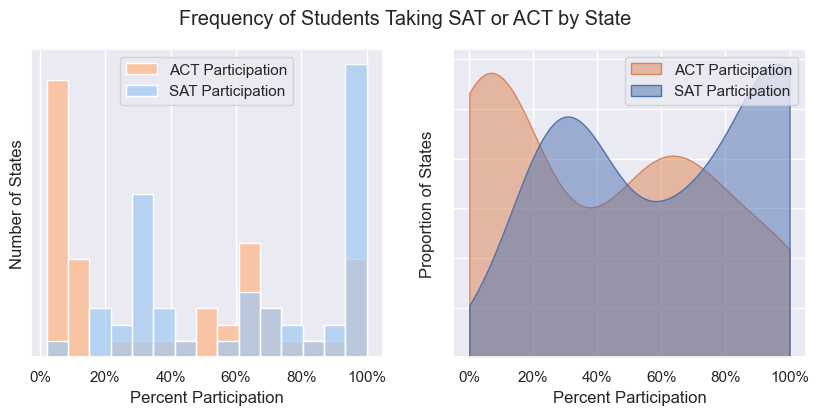

In [3]:
sns.set()
fig, axs = plt.subplots(ncols = 2, figsize=(10,4))
fig.suptitle('Frequency of Students Taking SAT or ACT by State')

# Histograph of ACT and SAT participation by State

sns.histplot(data = states[['Participation_act','Participation_sat']],
             ax = axs[0],
             bins=15,
             palette = 'pastel',
             alpha=0.7)
axs[0].set_xlabel('Percent Participation')
axs[0].set_ylabel('Number of States')
axs[0].set_yticks(ticks=[])
axs[0].set_xticks(ticks = [0,0.2,0.4,0.6,0.8,1],labels = ['0%','20%','40%','60%','80%','100%'])
axs[0].legend(['ACT Participation','SAT Participation'])

# Kernal Density Estimator for ACT and SAT participation by state 

sns.kdeplot(data = states[['Participation_act','Participation_sat']],
            ax = axs[1],
            shade=True,
            clip=(0,1),
            alpha=0.5)

axs[1].set_xlabel('Percent Participation')
axs[1].set_ylabel('Proportion of States')
axs[1].set_xticks(ticks = [0,0.2,0.4,0.6,0.8,1],labels = ['0%','20%','40%','60%','80%','100%'])
axs[1].set_yticks(ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6],labels = ['','','','','','',''])
axs[1].legend(['ACT Participation','SAT Participation']);



In the raw data (left) and the smoothed version (right), we see that the greatest number of states have over 80% participation in one test and less than 20% participation in the other.

In [4]:
# Difference between ACT and SAT participation by state 

states['act_bias'] = states['Participation_act'] - states['Participation_sat']


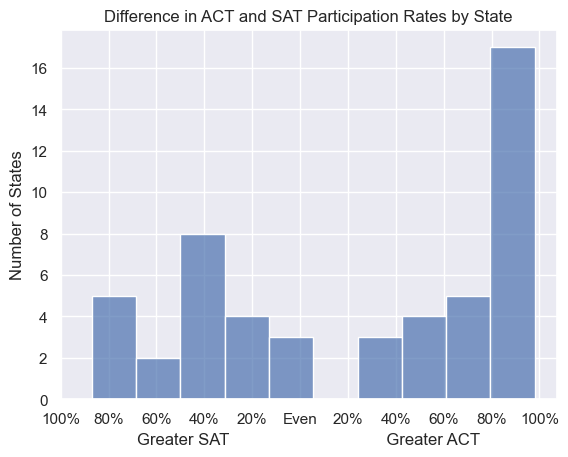

In [5]:
sns.histplot(data = states['act_bias'],
             bins=10,
             palette = 'pastel',
             alpha=0.7)
plt.title('Difference in ACT and SAT Participation Rates by State')
plt.xlabel('Greater SAT                                  Greater ACT')
plt.xticks(ticks = [-1,-.8,-.6,-.4,-0.2,0,.2,.4,.6,.8,1],labels = ['100%','80%','60%','40%','20%','Even','20%','40%','60%','80%','100%'])
plt.ylabel('Number of States');

This chart shows the following:
    1.  Few, if any, states have close to the same number of students taking each test.
    2.  The number of ACT-heavy states is significantly greater than the number of SAT-heavy states.
        
        (It is worth noting, though not for the purposes of this study, that the divide between ACT and SAT states is highly 
        correlated with US geography and political trends.)

# II.  25th Percentile College Admissions have Comparably Lower ACT Scores
(There is no significant comparable discrepancy at the 75th percentile of college admissions)

In [44]:
# Read SAT/ACT College Data

colleges = pd.read_csv('../data/sat_act_by_college.csv')

In [45]:
# View the data

colleges.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [46]:
#  Exclude "test-blind" colleges (most of whom happen to be in the Univ of California system!)
#  "Test-blind" colleges do not consider standardized tests in their admissions decisions 
#  High ACT scores will not help students get into the excluded colleges.  

colleges = colleges[colleges['Policy Details'].str.contains('blind') == False]

In [47]:
# Splitting and Converting 25th/75th Percentile Data

colleges[['SAT_25','SAT_75']] = colleges.iloc[:,6].str.split('-',expand=True).dropna(axis=1)
colleges[['ACT_25','ACT_75']] = colleges.iloc[:,7].str.split('-',expand=True).dropna(axis=1)


In [48]:
# View columns

colleges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 415
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   School                          395 non-null    object
 1   Test Optional?                  395 non-null    object
 2   Applies to Class Year(s)        369 non-null    object
 3   Policy Details                  395 non-null    object
 4   Number of Applicants            395 non-null    int64 
 5   Accept Rate                     395 non-null    object
 6   SAT Total 25th-75th Percentile  395 non-null    object
 7   ACT Total 25th-75th Percentile  395 non-null    object
 8   SAT_25                          395 non-null    object
 9   SAT_75                          395 non-null    object
 10  ACT_25                          395 non-null    object
 11  ACT_75                          395 non-null    object
dtypes: int64(1), object(11)
memory usage: 40.1+ KB


In [49]:
# Reading percentile data - Source: 2018 ACT/SAT Concordance Tables from collegeboard.org

percentiles = pd.read_csv('../data/percentiles.csv').dropna(axis=0,how='all')

# Splitting percentile chart into ACT and SAT

percentiles_sat = percentiles.iloc[:,[2,3]]
percentiles_act = percentiles.iloc[:,[0,1]].dropna(how='all')


In [50]:
# View columns

percentiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   act_score    36 non-null     float64
 1   act_percent  36 non-null     float64
 2   sat_score    101 non-null    int64  
 3   sat_percent  101 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [51]:
# Merge College and Percentiles dataframes to convert SAT/ACT scores to percentiles

colleges['SAT_25'] = colleges['SAT_25'].apply(pd.to_numeric,errors='coerce',downcast='float').round(-1).map(dict(zip(percentiles_sat['sat_score'],percentiles_sat['sat_percent'])))
colleges['SAT_75'] = colleges['SAT_75'].apply(pd.to_numeric,errors='coerce',downcast='float').round(-1).map(dict(zip(percentiles_sat['sat_score'],percentiles_sat['sat_percent']))) 
colleges['ACT_25'] = colleges['ACT_25'].apply(pd.to_numeric,errors='coerce',downcast='float').round().map(dict(zip(percentiles_act['act_score'],percentiles_act['act_percent'])))
colleges['ACT_75'] = colleges['ACT_75'].apply(pd.to_numeric,errors='coerce',downcast='float').round().map(dict(zip(percentiles_act['act_score'],percentiles_act['act_percent'])))

In [65]:
# Create columns to show ACT bias at 25th and 75th percentile

colleges['ACT_bias_25'] = colleges['ACT_25'] - colleges['SAT_25']
colleges['ACT_bias_75'] = colleges['ACT_75'] - colleges['SAT_75']

In [69]:
colleges[['ACT_bias_25','ACT_bias_75']].describe()

,ACT_bias_25,ACT_bias_75
count,381.000000,385.000000
mean,5.727034,0.883117
std,5.471364,3.239462
min,-13.000000,-17.000000
25%,2.000000,-1.000000
50%,5.000000,0.000000
75%,9.000000,2.000000
max,29.000000,19.000000


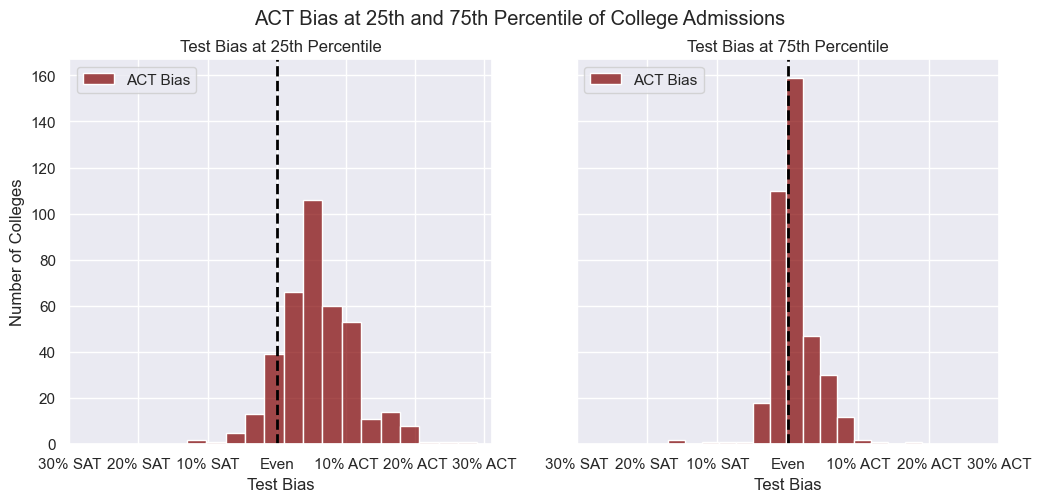

In [16]:
fig, axs = plt.subplots(ncols = 2, sharey = True, figsize=(12,5))

fig.suptitle('ACT Bias at 25th and 75th Percentile of College Admissions')

sns.histplot(data = colleges['ACT_bias_25'],
             ax = axs[0],
             bins=15,
             color = 'maroon',
             alpha=0.7)
axs[0].set_title('Test Bias at 25th Percentile')
axs[0].set_xlabel('Test Bias')
axs[0].set_ylabel('Number of Colleges')
axs[0].set_xticks(ticks = [-30,-20,-10,0,10,20,30],labels = ['30% SAT','20% SAT','10% SAT','Even','10% ACT','20% ACT', '30% ACT'])
axs[0].legend(['ACT Bias'],loc='upper left')
axs[0].axvline(0,color='black',linestyle='dashed',linewidth=2)

sns.histplot(data = colleges['ACT_bias_75'],
             ax = axs[1],
             color = 'maroon',
             bins=15,
             alpha=0.7)
axs[1].set_title('Test Bias at 75th Percentile')
axs[1].set_xlabel('Test Bias')
axs[1].set_ylabel('Number of Colleges')
axs[1].set_xticks(ticks = [-30,-20,-10,0,10,20,30],labels = ['30% SAT','20% SAT','10% SAT','Even','10% ACT','20% ACT', '30% ACT'])
axs[1].legend(['ACT Bias'],loc='upper left')
axs[1].axvline(0,color='black',linestyle='dashed',linewidth=2);



In [17]:
comparison = colleges.dropna(axis=0)
print(stats.ttest_ind(comparison['ACT_25'],comparison['SAT_25']))
print(stats.ttest_ind(comparison['ACT_75'],comparison['SAT_75']))

Ttest_indResult(statistic=4.639560107981782, pvalue=4.1576103201496326e-06)
Ttest_indResult(statistic=1.682016652934928, pvalue=0.09300532837737657)


At the 25th percentile, the p value is approximately 0.0000042. The discrepancy between SAT and ACT scores for students in the 25th percentile of college admissions is statistically significant, and we cannot reject the null hypothesis that the discrepancy is due to random sampling.  At the 75th percentile, the distribution still appears somewhat skewed, but the p-value of 0.093 is too high to reject the null hypothesis that this skew is due to variations in random sampling. 

# CA Students Perform Better on ACTs

In [18]:
# Reading the data

ca_sat = pd.read_csv('../data/SAT_2019_ca.csv')
ca_act = pd.read_csv('../data/act_2019_ca.csv')

In [19]:
# Viewing the data

ca_sat.info()
ca_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [20]:
# Selecting, merging, and renaming columns

ca_sat = ca_sat[['SCode','Enroll12','NumTSTTakr12','TotNumBothBenchmark12','PctBothBenchmark12']]
ca_act = ca_act[['SCode','Enroll12','NumTstTakr','NumGE21','PctGE21']]
ca = pd.merge(ca_sat,ca_act,how='left',on='SCode',suffixes=['sat','act'])
ca.columns=['school','enroll_sat','num_sat','num_pass_sat','per_pass_sat','enroll_act','num_act','num_pass_act','per_pass_act']


In [21]:
# Converting columns to numeric

ca['num_pass_sat'] = pd.to_numeric(ca['num_pass_sat'],errors='coerce')
ca['per_pass_sat'] = pd.to_numeric(ca['per_pass_sat'],errors='coerce')
ca['num_pass_act'] = pd.to_numeric(ca['num_pass_act'],errors='coerce')
ca['per_pass_act'] = pd.to_numeric(ca['per_pass_act'],errors='coerce')

ca = ca[ca['school'] != 0]
ca.dropna(how='any',axis=0,inplace=True)

# Viewing cleaned columns

ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 2 to 1979
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        994 non-null    float64
 1   enroll_sat    994 non-null    float64
 2   num_sat       994 non-null    float64
 3   num_pass_sat  994 non-null    float64
 4   per_pass_sat  994 non-null    float64
 5   enroll_act    994 non-null    float64
 6   num_act       994 non-null    float64
 7   num_pass_act  994 non-null    float64
 8   per_pass_act  994 non-null    float64
dtypes: float64(9)
memory usage: 77.7 KB


In [107]:
# Calculating mean and std manually

mean_no_sat = ca['num_pass_sat'].sum()/len(ca['num_pass_sat'])
mean_per_sat = ca['per_pass_sat'].sum()/len(ca['per_pass_sat'])
mean_no_act = ca['num_pass_act'].sum()/len(ca['num_pass_act'])
mean_per_act = ca['per_pass_act'].sum()/len(ca['per_pass_act'])

print(f'Mean # Passing SAT:  {mean_no_sat} \nMean % Passing SAT  {mean_per_sat} \n')

print(f'Mean # Passing ACT:  {mean_no_act} \nMean % Passing ACT  {mean_per_act}')

def stdev(group, mean):
    total = 0
    count = 0
    for i in group:
        total += (i - mean)**2
        count += 1
    return (total/count)**0.5

print('\nStd Dev # Passing SAT:')
print(stdev(ca['num_pass_sat'],mean_no_sat))

print('\nStd Dev % Passing SAT:')
print(stdev(ca['per_pass_sat'],mean_per_sat))

print('\nStd Dev # Passing ACT:')
print(stdev(ca['num_pass_act'],mean_no_act))

print('\nStd Dev % Passing ACT:')
print(stdev(ca['per_pass_act'],mean_per_act))

Mean # Passing SAT:  73.08551307847083 
Mean % Passing SAT  45.418581488933604 

Mean # Passing ACT:  44.43158953722334 
Mean % Passing ACT  51.96521126760563

Std Dev # Passing SAT:
63.17950323612328

Std Dev % Passing SAT:
23.18472270052201

Std Dev # Passing ACT:
50.332774383610555

Std Dev % Passing ACT:
26.23681412247718


In [108]:
#  These manually calculated values match the table below.  

ca.describe().style.background_gradient(subset=['per_pass_sat','per_pass_act'],cmap='twilight',high=100)

,school,enroll_sat,num_sat,num_pass_sat,per_pass_sat,enroll_act,num_act,num_pass_act,per_pass_act,pass_diff
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,2285646.876258,378.568410,154.190141,73.085513,45.418581,378.568410,79.804829,44.431590,51.965211,6.546630
std,1714063.556427,203.294051,106.967845,63.211308,23.196394,203.294051,66.933059,50.358112,26.250022,11.531407
min,100065.000000,34.000000,15.000000,0.000000,0.000000,34.000000,15.000000,0.000000,0.000000,-30.800000
25%,135941.500000,193.250000,76.000000,26.000000,26.737500,193.250000,33.250000,13.000000,29.350000,-0.825000
50%,1939569.500000,386.000000,132.000000,55.000000,43.805000,386.000000,59.000000,25.000000,53.680000,6.145000
75%,3730111.500000,526.000000,199.000000,104.000000,63.730000,526.000000,105.750000,55.000000,75.000000,13.285000
max,6120158.000000,1135.000000,932.000000,385.000000,98.750000,1135.000000,512.000000,392.000000,100.000000,48.020000


Overall, it appears that fewer students are taking the ACT than the SAT, but they are passing with greater frequency. 

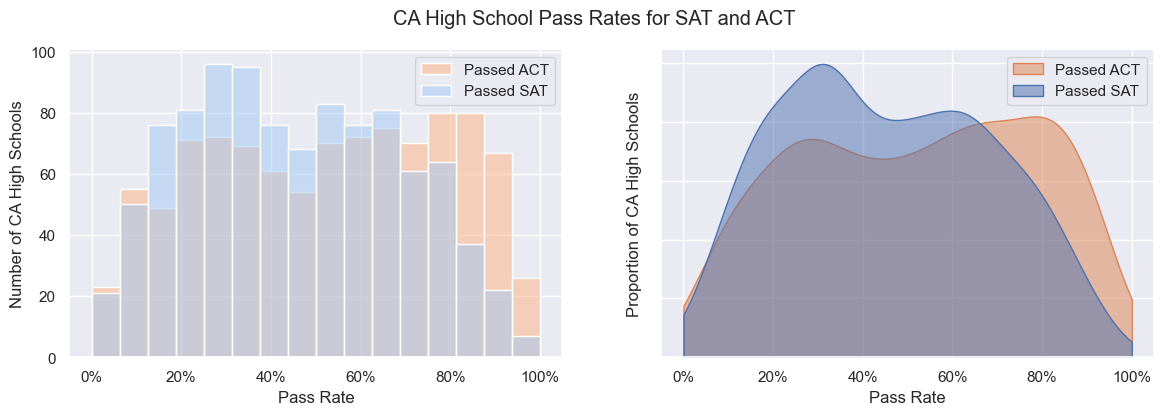

In [23]:
# Schools with passing SAT/ACT

fig, axs = plt.subplots(ncols = 2, figsize=(14,4))

fig.suptitle('CA High School Pass Rates for SAT and ACT')

sns.histplot(data = ca[['per_pass_sat','per_pass_act']],             
             palette = 'pastel',
             ax=axs[0],
             alpha=0.5)

axs[0].legend(labels=['Passed ACT','Passed SAT'])
axs[0].set_xlabel('Pass Rate')
axs[0].set_ylabel('Number of CA High Schools')
axs[0].set_xticks(ticks = [0,20,40,60,80,100],labels = ['0%','20%','40%','60%','80%','100%'])



sns.kdeplot(data = ca[['per_pass_sat','per_pass_act']],
            ax = axs[1],
            shade=True,
            clip=(0,100),
            alpha=0.5)

axs[1].legend(labels=['Passed ACT','Passed SAT'])
axs[1].set_xlabel('Pass Rate')
axs[1].set_ylabel('Proportion of CA High Schools')
axs[1].set_yticks(ticks = [0.0015,.003,.0045,.006,.0075],labels = ["","","","",""]);
axs[1].set_xticks(ticks = [0,20,40,60,80,100],labels = ['0%','20%','40%','60%','80%','100%']);


These charts (raw data on left and smoothed on right) show that in schools where 70% or more of students are passing both tests, a greater proportion of students are passing the ACT than the SAT.

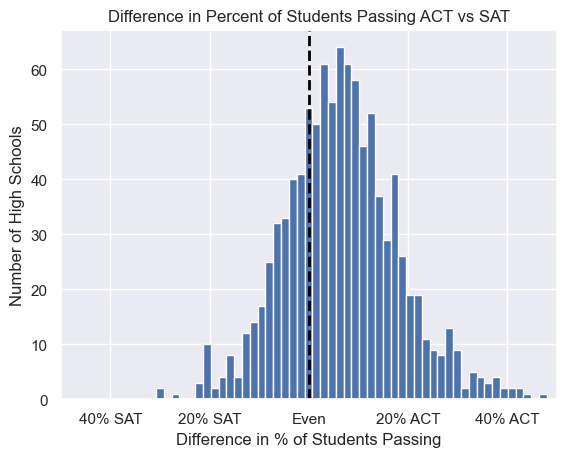

In [24]:
#  How big is the difference?

ca['pass_diff'] = ca['per_pass_act']-ca['per_pass_sat']
ca['pass_diff'].hist(bins=50)
plt.title('Difference in Percent of Students Passing ACT vs SAT')
plt.axvline(0,color='black',linestyle='dashed',linewidth=2)
plt.xlabel('Difference in % of Students Passing')
plt.xticks(ticks=[-40,-20,0,20,40],labels=['40% SAT','20% SAT','Even','20% ACT','40% ACT'])
plt.ylabel('Number of High Schools')
plt.xlim(-50,50);


In [25]:
print(stats.ttest_ind(ca['per_pass_act'],ca['per_pass_sat']))

Ttest_indResult(statistic=5.892024821164323, pvalue=4.470268149672955e-09)


P value is less than 10^-8.  The null hypothesis that students in CA pass the ACT and SAT at comparable rates should be rejected.

#  Trend Across Different Types of Schools

## 1.  All Schools

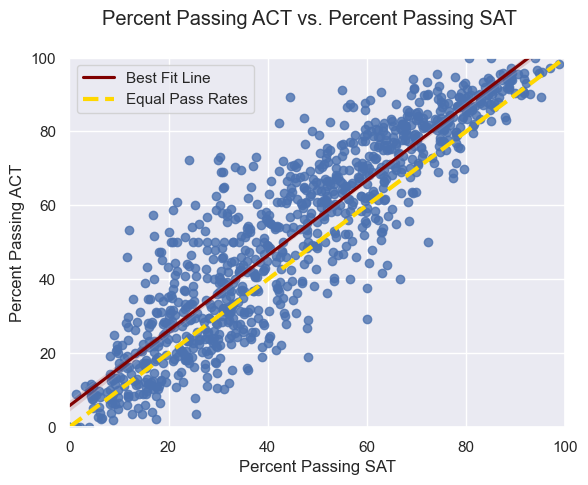

In [26]:
sns.regplot(y=ca['per_pass_act'],
            x=ca['per_pass_sat'],
            line_kws={'color':'maroon','label':'Best Fit Line'})
plt.suptitle('Percent Passing ACT vs. Percent Passing SAT')
plt.ylabel('Percent Passing ACT')
plt.xlabel('Percent Passing SAT')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],color='gold',linestyle='dashed',linewidth=3,label='Equal Pass Rates')
plt.legend();


In [27]:
ca[['per_pass_act','per_pass_sat']].corr()

,per_pass_act,per_pass_sat
per_pass_act,1.000000,0.898466
per_pass_sat,0.898466,1.000000


It should not be surprising that there is a high correlation (0.898) between ACT and SAT success.

## 2.  Performance in Schools With More Students Taking ACT than SAT

ACT pass rates are about the same in the 145 CA schools where more students are taking the ACTs.

In [28]:
ca_more_act = ca[ca['num_act'] > ca['num_sat']]

In [29]:
ca_more_act.info()
ca_more_act.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 13 to 1975
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        145 non-null    float64
 1   enroll_sat    145 non-null    float64
 2   num_sat       145 non-null    float64
 3   num_pass_sat  145 non-null    float64
 4   per_pass_sat  145 non-null    float64
 5   enroll_act    145 non-null    float64
 6   num_act       145 non-null    float64
 7   num_pass_act  145 non-null    float64
 8   per_pass_act  145 non-null    float64
 9   pass_diff     145 non-null    float64
dtypes: float64(10)
memory usage: 12.5 KB


,school,enroll_sat,num_sat,num_pass_sat,per_pass_sat,enroll_act,num_act,num_pass_act,per_pass_act,pass_diff
count,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.706464e+06,281.931034,101.717241,53.931034,43.388345,281.931034,150.917241,71.200000,40.613103,-2.775241
std,1.803141e+06,207.732355,70.820852,60.700958,28.957838,207.732355,104.871582,84.289152,32.763690,9.834371
min,1.000650e+05,34.000000,15.000000,1.000000,4.760000,34.000000,20.000000,1.000000,2.330000,-30.800000
25%,1.212850e+05,112.000000,46.000000,9.000000,17.430000,112.000000,83.000000,12.000000,12.770000,-8.000000
50%,1.030493e+06,166.000000,82.000000,24.000000,32.650000,166.000000,126.000000,27.000000,25.450000,-2.630000
75%,3.331014e+06,467.000000,139.000000,83.000000,77.360000,467.000000,195.000000,114.000000,79.550000,3.760000
max,6.116750e+06,808.000000,425.000000,244.000000,96.950000,808.000000,512.000000,392.000000,97.300000,33.750000


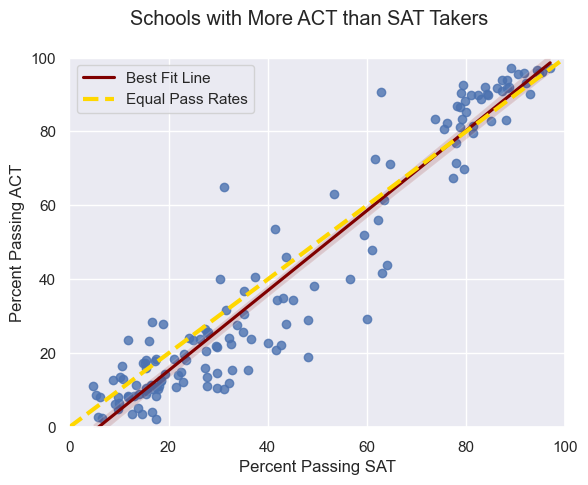

In [30]:
sns.regplot(y=ca_more_act['per_pass_act'],
            x=ca_more_act['per_pass_sat'],
            line_kws={'color':'maroon','label':'Best Fit Line'})
plt.suptitle('Schools with More ACT than SAT Takers')
plt.ylabel('Percent Passing ACT')
plt.xlabel('Percent Passing SAT')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],color='gold',linestyle='dashed',linewidth=3,label='Equal Pass Rates')
plt.legend();


In [31]:
print(stats.ttest_ind(ca_more_act['per_pass_act'],ca_more_act['per_pass_sat']))

Ttest_indResult(statistic=-0.7642563094842535, pvalue=0.4453402165132906)


# 3.  Performance in Schools with Highest No. of ACT Test Takers


In schools with the largest number of ACT test takers (>= 100), ACT takers are more likely to pass than their SAT counterparts in schools where students overall are passing at a higher rate.

In these schools, ACT takers are less likely to pass than their SAT counterparts in schools where students overall are passing at a lower rate.

In [32]:
ca_high_act = ca[ca['num_act'] >= 100]

In [33]:
ca_high_act.describe()

,school,enroll_sat,num_sat,num_pass_sat,per_pass_sat,enroll_act,num_act,num_pass_act,per_pass_act,pass_diff
count,2.660000e+02,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,2.283486e+06,499.394737,202.406015,121.556391,57.805902,499.394737,165.661654,100.206767,60.423346,2.617444
std,1.610188e+06,189.756205,95.092173,76.738459,24.791021,189.756205,71.670829,65.495373,29.176155,9.028693
min,1.003540e+05,59.000000,27.000000,3.000000,5.880000,59.000000,100.000000,4.000000,2.610000,-30.800000
25%,7.300458e+05,398.000000,139.250000,56.250000,35.052500,398.000000,119.000000,45.000000,29.390000,-3.095000
50%,2.016130e+06,519.000000,191.500000,117.500000,64.350000,519.000000,145.500000,94.500000,71.370000,3.745000
75%,3.633032e+06,609.750000,247.000000,169.750000,78.507500,609.750000,189.750000,136.750000,85.395000,8.215000
max,5.732201e+06,1120.000000,607.000000,385.000000,96.950000,1120.000000,512.000000,392.000000,97.300000,31.090000


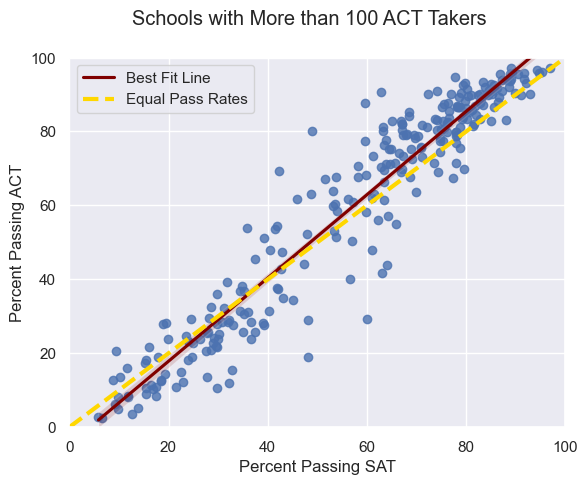

In [34]:
sns.regplot(y=ca_high_act['per_pass_act'],
            x=ca_high_act['per_pass_sat'],
            line_kws={'color':'maroon','label':'Best Fit Line'})
plt.suptitle('Schools with More than 100 ACT Takers')
plt.ylabel('Percent Passing ACT')
plt.xlabel('Percent Passing SAT')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],color='gold',linestyle='dashed',linewidth=3,label='Equal Pass Rates')
plt.legend();


In [35]:
print(stats.ttest_ind(ca_high_act['per_pass_act'],ca_high_act['per_pass_sat']))

Ttest_indResult(statistic=1.1149989625968386, pvalue=0.26535619196610694)


# 4.  Performance in Largest Schools


In [36]:
ca_large = ca[ca['enroll_sat'] > 500]
ca_large.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 6 to 1979
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        293 non-null    float64
 1   enroll_sat    293 non-null    float64
 2   num_sat       293 non-null    float64
 3   num_pass_sat  293 non-null    float64
 4   per_pass_sat  293 non-null    float64
 5   enroll_act    293 non-null    float64
 6   num_act       293 non-null    float64
 7   num_pass_act  293 non-null    float64
 8   per_pass_act  293 non-null    float64
 9   pass_diff     293 non-null    float64
dtypes: float64(10)
memory usage: 25.2 KB


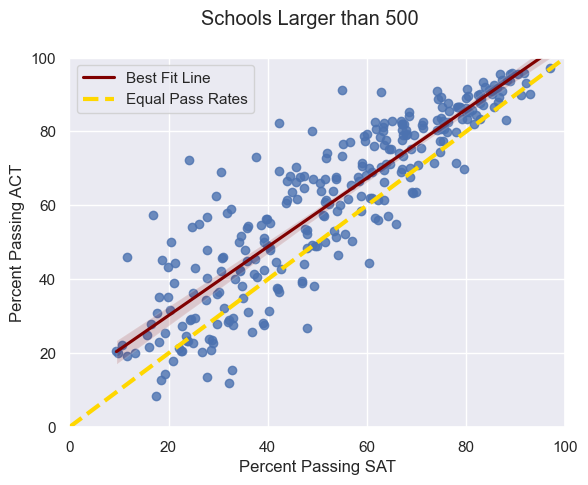

In [37]:
sns.regplot(y=ca_large['per_pass_act'],
            x=ca_large['per_pass_sat'],
            line_kws={'color':'maroon','label':'Best Fit Line'})
plt.suptitle('Schools Larger than 500')
plt.ylabel('Percent Passing ACT')
plt.xlabel('Percent Passing SAT')
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100],color='gold',linestyle='dashed',linewidth=3,label='Equal Pass Rates')
plt.legend();


In [38]:
print(stats.ttest_ind(ca_large['per_pass_act'],ca_large['per_pass_sat']))

Ttest_indResult(statistic=4.259914377322123, pvalue=2.3834432579361257e-05)


Of the populations sampled above, only in schools larger than 500 is the p-value low enough to be statistically significant (0.000024).

# Conclusions

*  Students taking the ACTs are admitted at the 25th percentile of entering college students with comparably lower ACT scores than their SAT counterparts. 

*  This difference in percentiles is approximately 5%.  In other words, a student scoring in the 70th percentile of the ACT is as likely to be admitted as a student in the 75th percentile of the SAT.  This difference is statistically significant and cannot be explained away as the product of sampling variance.

*  CA students are likely performing higher on the ACTs than the SATs, but the difference is not sufficient to exclude the possibility of sampling bias.